#**COLOR DETECTION AND CORRECTION**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from sklearn.cluster import KMeans
from collections import Counter
from IPython.display import display, Image

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


*   We start by loading all the libraries and CIFAR-10 dataset.(This dataset contains 60,000 color images)
*   To prepare the data for neural network training, the pixel values of the images are normalized.



In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(32 * 32 * 3, activation='sigmoid'),
    Reshape((32, 32, 3))
])

model.compile(optimizer=Adam(), loss='mean_squared_error')

model.fit(x_train, x_train, epochs=20, batch_size=128, validation_split=0.2)



Epoch 1/20
313/313 [==============================] - 112s 351ms/step - loss: 0.0250 - val_loss: 0.0149
Epoch 2/20
313/313 [==============================] - 107s 341ms/step - loss: 0.0133 - val_loss: 0.0118
Epoch 3/20
313/313 [==============================] - 107s 342ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 4/20
313/313 [==============================] - 107s 343ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 5/20
313/313 [==============================] - 115s 367ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 6/20
313/313 [==============================] - 107s 342ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 7/20
313/313 [==============================] - 107s 342ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 8/20
313/313 [==============================] - 107s 343ms/step - loss: 0.0075 - val_loss: 0.0072
Epoch 9/20
313/313 [==============================] - 109s 348ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/20
313/313 [==============================] - 109s 349m

Model Architecture:
*   The model is defined as a Sequential model, which is a linear stack of layers.It starts with three convolutional layers (Conv2D) with 32, 64, and 128 filters respectively.Each convolutional layer is followed by a max-pooling layer (MaxPooling2D) to downsample the spatial dimensions.
*   The activation function used in the convolutional layers is ReLU ('relu').
After the last max-pooling layer, the data is flattened (Flatten) to be passed to a fully connected layer (Dense) with 512 neurons. This layer serves as a bottleneck layer, reducing the dimensionality of the data.
*   The next dense layer has a number of neurons equal to the flattened size of the input image (32x32x3) and uses the sigmoid activation function. This layer aims to reconstruct the original input image.
*   Finally this is reshaped to have same dimensions as the input image.

Compiling the model:
*   The model is compiled using the Adam optimizer (Adam()) with default parameters.The loss function used is mean squared error ('mean_squared_error'). This loss function measures the average squared difference between the predicted image and the actual input image.

Training the Model:

 *   The model is trained using the fit method.
The input data (x_train) is used as both input and target output because this is an autoencoder, which learns to reconstruct its input.
The number of epochs is set to 20, indicating the number of times the entire dataset is passed forward and backward through the neural network during training.
The batch size is set to 128, which means that the dataset is divided into batches of 128 samples, and the model's parameters are updated after each batch with a vialidation split of 0.2


In [ ]:
model.save('protanopia_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The model is saved and is named as protanopia_model in the Hierarchical Data Format (HDF5) format.

In [ ]:

protanopia_model = load_model('protanopia_model.h5')


def perform_color_clustering(image):
    pixels = image.reshape((-1, 3))
    num_clusters = 5

    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixels)

    clustered_colors = kmeans.cluster_centers_
    labels = kmeans.labels_

    return clustered_colors, labels


def detect_objects_and_colors(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    clustered_colors, labels = perform_color_clustering(image_rgb)
    pixel_counts = Counter(labels)

    for i, color in enumerate(clustered_colors):
        color_rgb = tuple(map(int, color))
        count = pixel_counts[i]
        cv2.rectangle(image_rgb, (0, i*50), (200, i*50 + 40), color_rgb, -1)
        cv2.putText(image_rgb, f'Color {i+1}: {color_rgb} ({count} pixels)', (220, i*50 + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    detection_image_path = "detection_image.jpg"
    cv2.imwrite(detection_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    return detection_image_path

def display_color_corrected_image(corrected_image):
    plt.figure(figsize=(10, 8))
    plt.imshow(corrected_image)
    plt.axis('off')
    plt.show()


Model Loading:
*    Loading protanopia_model.h5.

Color Clustering Function (perform_color_clustering):
*    This function takes an image as input and reshapes it into a 2D array of pixels.
It then performs color clustering using K-Means clustering algorithm.
The number of clusters is set to 5, but you can adjust this based on your requirements.
It returns the clustered colors and labels.


Object and Color Detection Function (detect_objects_and_colors):
*   This function reads an image from a specified path and converts it to RGB format.
It calls the perform_color_clustering function to perform color clustering on the image.
Using the cluster information, it counts the number of pixels in each cluster and visualizes it by drawing rectangles around each cluster and displaying the predominant color information.
The image with clustered color rectangles is saved and displayed.

Color Corrected Image Display Function (display_color_corrected_image):
*  Displays a color-corrected image using Matplotlib.


FileUpload(value={}, description='Upload')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


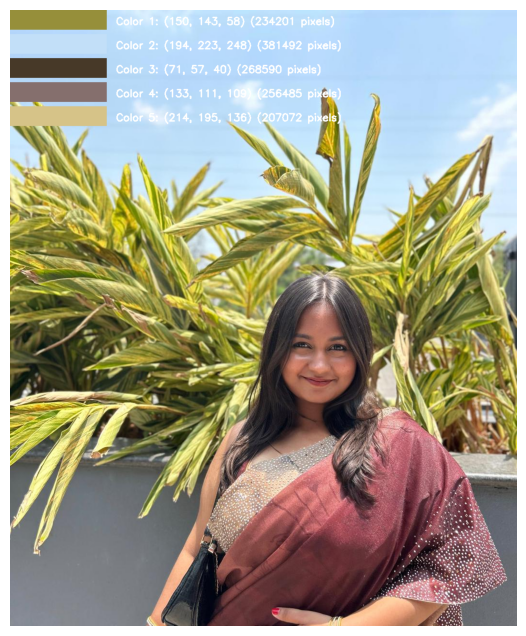

1/1 [==============================] - 0s 29ms/step


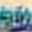

In [ ]:
def process_image(image_path):
    detection_image_path = detect_objects_and_colors(image_path)

    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image_resized = cv2.resize(original_image, (32, 32))
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(image, (32, 32))
    img = img.astype('float32') / 255.0

    corrected_img = model.predict(np.expand_dims(img, axis=0))[0]
    corrected_img = (corrected_img * 255).astype(np.uint8)
    corrected_img = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)
    cv2.imwrite("corrected_image.jpg", cv2.cvtColor(corrected_img, cv2.COLOR_RGB2BGR))
    display(Image(filename="corrected_image.jpg"))

def on_file_upload(change):
    if file_upload.value:
        for key in file_upload.value:
            file_data = file_upload.value[key]
            file_name = file_data['metadata']['name']
            file_content = file_data['content']
            with open(file_name, 'wb') as f:
                f.write(file_content)
            process_image(file_name)
    else:
        print("No file uploaded.")

file_upload = widgets.FileUpload()
file_upload.observe(on_file_upload, names='value')

display(file_upload)






Image Processing Function (process_image):
*  Detects colors in the original image and displays clustered color rectangles.
Resizes the original image to match the input shape required by the color correction model.
Predicts the corrected image using a pre-trained convolutional autoencoder model.
Saves and displays the corrected image.

File Upload Handling Function (on_file_upload):
*  Processes the uploaded file using the process_image function.

File Upload Widget Creation:
*  Creates a file upload widget and sets up an observer to handle file uploads.

Display:
*  Displays the file upload widget.

#FUTURE WORK
real-time processing capabilities can be added to this image processing pipeline. Currently, the code processes images uploaded by the user one at a time. To make it real-time, the image processing functions can be integrated into a graphical user interface (GUI) application that continuously captures video from a camera feed. As each frame is captured, it can be processed in real-time using the color clustering, object detection, and color correction algorithms. The GUI can display the original video feed alongside the processed video feed, allowing users to see the color-corrected output in real-time. Additionally, optimizations such as parallel processing and hardware acceleration can be explored to improve the speed and efficiency of the real-time image processing pipeline, enabling smoother and faster processing of video streams
